<a href="https://www.uvg.edu.gt/"><img align="left" src="https://www.uvg.edu.gt/wp-content/uploads/socialshare-logo.jpg" width="90" height="90"></a>
**_Corporate Master in Applied Data Science_**<br/>
**_Text Mining & Natural Language Processing_**<br/>
**_Catedratico: Pedro Alberto Aguilar Nuñez_**<br/>
<br/>

Integrantes:
- Aldo Montenegro Margnoni
- Gabriel Fernando Montenero Ortiz
- Axel Adolfo Muralles Carranza
- German Antonio Oliva Muralles

# Jupyter Notebook Tarea 2 Scrapping wikipedia / tokens vs vocabulario

## Descripcion
En el presente notebook, estaremos realizando el procesamiento de varios documentos de texto, los cuales son resultado de un scrapping de articulos de Wikipedia, de estos documentos estaremos obteniendo tokens por cada palabra dentro de cada uno de ellos, y calcularamos el numero de tokens y el numero de palabras en el vocabulario incrementalmente en cada iteracion, para poder observar como se comporta el vocabulario en funcion del numero de tokens.

Antes de proceder con este notebook, debemos asegurarnos de que contamos con el archivo *token_VS_vocabulary.json*, de lo contrario debemos seguir las instrucciones que se detallan [aqui](https://github.com/Text-Mining-and-NLP-workspace/Tarea-2-Scrapping-wikipedia-tokens-vs-vocabulario) 

In [3]:
#carga de librerias necesarias para el procesamiento
import os
import re
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
sns.set_theme(style="darkgrid")

Una vez cargadas las librerias necesarias, cargamos el archivo que contiene los documentos a procesar en un dataframe de pandas

In [4]:
filename='token_VS_vocabulary.json'
with open(filename, 'r') as f:
    data=pd.DataFrame(json.load(f))

Observamos la estructura de nuestro data frame

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


Podemos ver que contamos con 500 documentos, de los cuales necesitamos aproximadamente 250 para obtener aproximadamente 1 millon de tokens, realizamos un primer procesamiento en el cual generamos dos valores por cada iteracion, el numero total de tokens, y el numero de palabras actual en el vocabulario

In [5]:
token_lst=[]
token=[]
vocabulary=[]
for text in data.iloc[0:250,0]:
    corpus=''.join(text)       
    token_lst+=re.split('\W+',corpus.lower())
    vocabulary_lst=Counter(token_lst)   
    token.append(len(token_lst))
    vocabulary.append(len(vocabulary_lst))

con los pares de datos que obtuvimos traazaremos una grafica, y tambien comprobaremos la validez de la Ley de Heaps, calculamos el coeficiente como la proporcion promedio entre el vocabulario con respecto a la raiz cuadrada de la cantidad de tokens, y trazamos una curva de la forma $kN^{1/2}$

In [6]:
df=pd.DataFrame({'token':token,'vocabulary':vocabulary})
df['estimated']=np.sqrt(df.token)
coef=(df['vocabulary']/df['estimated']).mean()   
df['Ley de Heaps '+str(int(round(coef,0)))+'*N^1/2']=int(round(coef,0))*np.sqrt(df.token)

#### Grafica Token VS Vocabulary (practico y teorico)

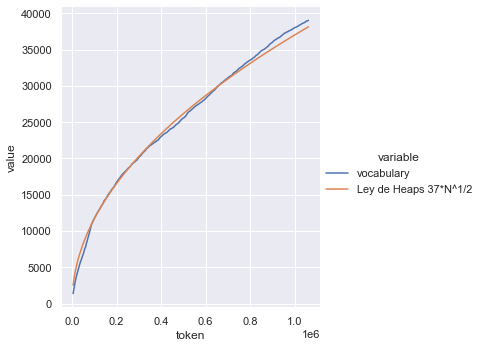

In [7]:
sns.relplot(x="token", y="value", kind="line", hue='variable',data=df.melt(id_vars =['token'], value_vars =['vocabulary', 'Ley de Heaps '+str(int(round(coef,0)))+'*N^1/2']))       
plt.show()


De lo anterior podemos demostrar que esta ley siempre se cumple, procesando aleatoreamente 250 documentos de nuestro set, y graficando las curvas de los resultados (esto puede tardar algunos minutos):

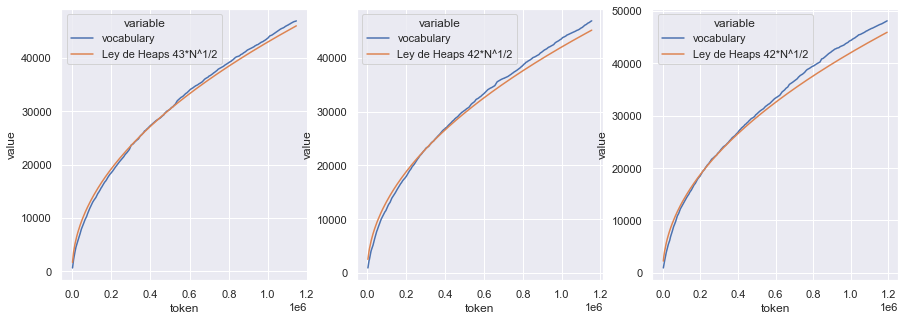

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax in axs.flat:
    token_lst=[]
    token=[]
    vocabulary=[]
    for text in data.sample(n=250,replace=False)['text']:
        corpus=''.join(text)       
        token_lst+=re.split('\W+',corpus.lower())
        vocabulary_lst=Counter(token_lst)    
        token.append(len(token_lst))
        vocabulary.append(len(vocabulary_lst))
    df=pd.DataFrame({'token':token,'vocabulary':vocabulary})
    df['estimated']=np.sqrt(df.token)
    coef=(df['vocabulary']/df['estimated']).mean()   
    df['Ley de Heaps '+str(int(round(coef,0)))+'*N^1/2']=int(round(coef,0))*np.sqrt(df.token)
    sns.lineplot(x="token", y="value", hue='variable',data=df.melt(id_vars =['token'], value_vars =['vocabulary', 'Ley de Heaps '+str(int(round(coef,0)))+'*N^1/2']),ax=ax)

En conclusion podemos observar que los modelos de la ley de Heaps se ajustan bastante a nuestros datosexperimentales